In [4]:
import rasterio
from matplotlib import pyplot as plt
import geopandas as gpd

In [5]:
src = rasterio.open(r"D:\Nirab\GIS5120-Lab-6\data\CDL_2023_clip_20241030205700_384619517\CDL_2023_clip_20241030205700_384619517.tif")

In [6]:
src.profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 22112, 'height': 19692, 'count': 1, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["NAD83",DATUM["North American Datum 1983",SPHEROID["GRS 1980",6378137,298.257222101004]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(30.0, 0.0, -28365.0,
       0.0, -30.0, 2003985.0), 'blockxsize': 22112, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}

In [7]:
img = src.read()

In [8]:
img

array([[[  0,   0,   0, ...,   0,   0,   0],
        [141, 176, 141, ...,   1,   1,   1],
        [142, 142, 141, ...,   1,   1,   1],
        ...,
        [121, 141, 141, ...,   2,   2,   2],
        [121, 141, 141, ...,   2,   2,   2],
        [  0,   0,   0, ...,   0,   0,   0]]], dtype=uint8)

In [9]:
img[0,:,:].shape

(19692, 22112)

In [10]:
img_test =img[0,500:1000,500:1000]

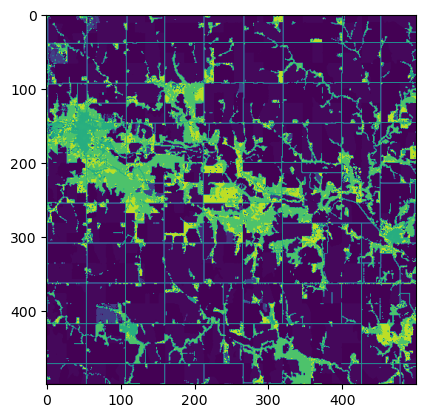

In [11]:
plt.imshow(img_test)

In [12]:
img_test

array([[176, 176, 122, ...,   5,   5,   5],
       [176, 176, 122, ...,   5,   5,   5],
       [176, 176, 122, ...,   5,   5,   5],
       ...,
       [121,   5,   5, ...,   1,   1,   1],
       [121,   5,   5, ...,   1,   1,   1],
       [121,   1,   1, ...,   5,   5,   5]], dtype=uint8)

In [13]:
soybean = (img_test == 5)*1

In [14]:
soybean

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

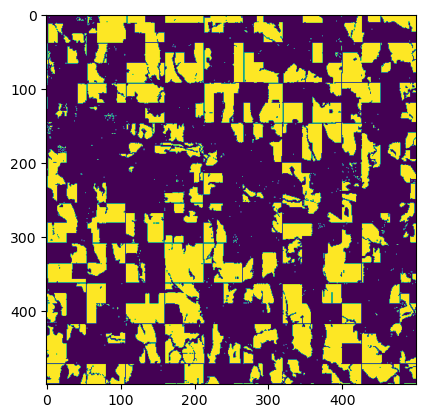

In [15]:
plt.imshow(soybean)

In [16]:
corn =  (img_test == 1)*1

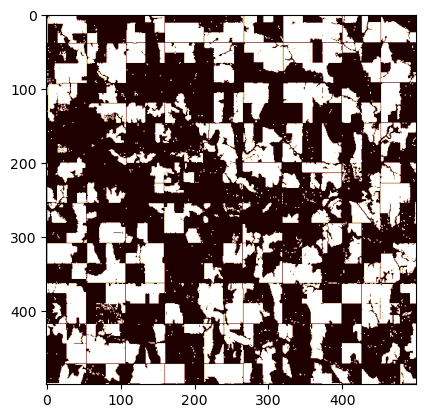

In [17]:
plt.imshow(corn,cmap='pink')

In [18]:
corn

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 0, 0]])

In [19]:
county = gpd.read_file(r"D:\Nirab\GIS5120-Lab-6\data\cb_2018_us_county_20m\cb_2018_us_county_20m.shp")

In [20]:
county

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,37,017,01026336,0500000US37017,37017,Bladen,06,2265887723,33010866,"POLYGON ((-78.902 34.83527, -78.7996 34.85086,..."
1,37,167,01025844,0500000US37167,37167,Stanly,06,1023370459,25242751,"POLYGON ((-80.49737 35.2021, -80.29542 35.5029..."
2,39,153,01074088,0500000US39153,39153,Summit,06,1069181981,18958267,"POLYGON ((-81.68699 41.13596, -81.68495 41.277..."
3,42,113,01213687,0500000US42113,42113,Sullivan,06,1165338428,6617028,"POLYGON ((-76.81373 41.59003, -76.22014 41.541..."
4,48,459,01384015,0500000US48459,48459,Upshur,06,1509910100,24878888,"POLYGON ((-95.15274 32.66095, -95.15211 32.902..."
...,...,...,...,...,...,...,...,...,...,...
3215,38,005,01034216,0500000US38005,38005,Benson,06,3596569006,131708143,"POLYGON ((-99.84661 48.3713, -99.49292 48.3709..."
3216,72,079,01804520,0500000US72079,72079,Lajas,13,155287827,106643202,"POLYGON ((-67.10904 18.05608, -67.06791 18.066..."
3217,31,159,00835901,0500000US31159,31159,Seward,06,1479995670,11542537,"POLYGON ((-97.36812 41.04695, -96.91094 41.046..."
3218,37,023,01008539,0500000US37023,37023,Burke,06,1311146878,20719896,"POLYGON ((-81.90665 35.88338, -81.94319 35.960..."


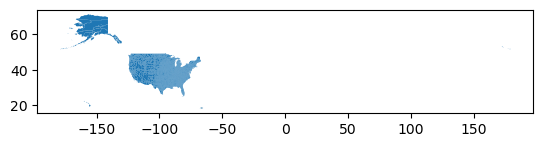

In [22]:
county.plot()
plt.show()

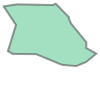

In [29]:
county.iloc[0,9]